In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
best_model = YOLO("best.pt")

## save the image with detected bbx

In [31]:
best_model.predict(source="data\\raw_data\\test\\IMG_7376.jpeg", show=False, conf=0.5, save=False, verbose=False)

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Asmi', 1: 'Lavariya', 2: 'Pancake', 3: 'Wade'}
 obb: None
 orig_img: array([[[ 50,  99, 137],
         [ 46,  95, 133],
         [ 42,  91, 129],
         ...,
         [233, 236, 234],
         [231, 234, 232],
         [225, 228, 226]],
 
        [[ 50,  99, 137],
         [ 48,  97, 135],
         [ 43,  92, 130],
         ...,
         [229, 232, 230],
         [230, 233, 231],
         [227, 230, 228]],
 
        [[ 50,  99, 137],
         [ 49,  98, 136],
         [ 44,  93, 131],
         ...,
         [228, 231, 229],
         [229, 232, 230],
         [227, 230, 228]],
 
        ...,
 
        [[144, 146, 146],
         [145, 147, 147],
         [144, 146, 146],
         ...,
         [  4,  10,  23],
         [  6,  12,  25],
         [  6,  12,  25]],
 
        [[148, 150, 150],
         [148, 150, 150],
         [144, 146, 

## Display image with BBX

In [ ]:
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO


categories = [
    {"id": 0, "name": "Asmi"},
    {"id": 1, "name": "Lavariya"},
    {"id": 2, "name": "Pancake"},
    {"id": 3, "name": "Wade"}
]

class_map = {category["id"]: category["name"] for category in categories}

def plot_predictions(model, image_path, conf_threshold=0.3):
    
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  
    results = model.predict(source=image_path, show=False, conf=conf_threshold, save=False)
    
    
    image_with_bbx = original_image.copy()
    
    
    for result in results:
        for box in result.boxes:
            
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            
            label_class = int(box.cls)  
            confidence = float(box.conf)
            
            class_name = class_map.get(label_class, "Unknown")
            # print(class_name)
            label = f"{class_name} ({confidence:.2f})"  
            
            # Draw the bounding box
            cv2.rectangle(image_with_bbx, (x1, y1), (x2, y2), (255, 0, 0), 6)
            
            text_x = x1   
            text_y = y1 -2
            cv2.putText(
                image_with_bbx,
                label,
                (text_x, text_y),
                cv2.FONT_HERSHEY_SIMPLEX,
                6,
                (0, 0, 0),
                16
            )
    
    
    plt.figure(figsize=(14, 8))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")
    
    # Image with Bounding Boxes
    plt.subplot(1, 2, 2)
    plt.imshow(image_with_bbx)
    plt.title("Image with Bounding Boxes")
    plt.axis("off")
    
    plt.show()



In [10]:
best_model = YOLO("best.pt")

In [37]:
test_path ="data\\raw_data\\test\\IMG_7377.jpeg"

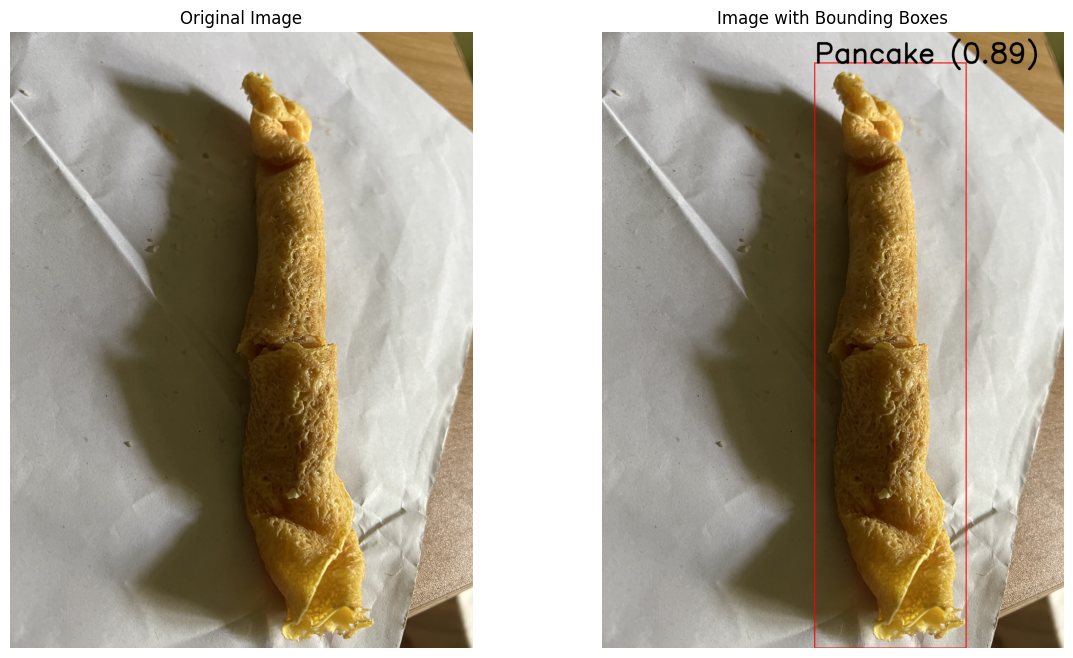

In [44]:
plot_predictions(best_model, test_path)